In [61]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, mean_absolute_error

In [27]:
# load data
iris = load_iris()
print("feature names:", iris.feature_names)
print("feature data example:", iris.data[0])
print("target species data example:", iris.target[0])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature data example: [5.1 3.5 1.4 0.2]
target species data example: 0


In [23]:
df = pd.concat(
    [
        pd.DataFrame(data=iris.data, columns=iris.feature_names),
        pd.DataFrame(data=iris.target, columns=['species'])
    ],
    axis=1
)

In [32]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

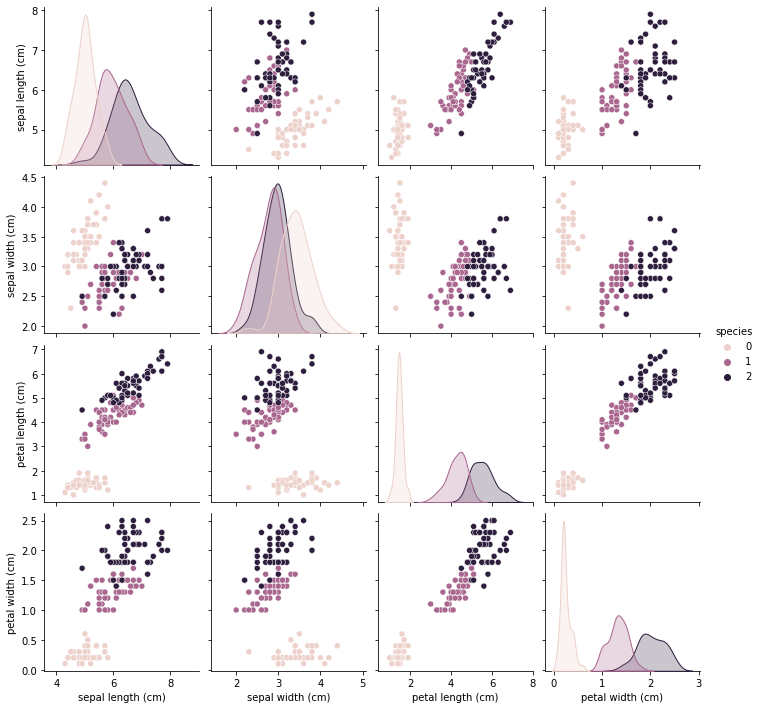

In [36]:
sns.pairplot(df, hue='species')

# Problem: Predict sepel length using regression

In [44]:
X = pd.concat(
    [
        df.drop(['species', 'sepal length (cm)'], axis=1),
        pd.get_dummies(df['species'])
    ],
    axis=1
)

In [46]:
y = df['sepal length (cm)']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=777)

In [49]:
model = linear_model.LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [59]:
print("score:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("median error:", median_absolute_error(y_pred, y_test))
print("mean error:", mean_absolute_error(y_pred, y_test))

score: 0.8879063187067266
median error: 0.22035868609096276
mean error: 0.24240248398100847


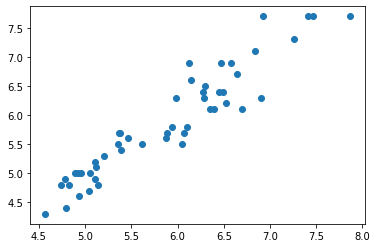

In [62]:
plt.scatter(y_pred, y_test)

In [66]:
for x in X[1:10].values:
    print(x)

[3.  1.4 0.2 1.  0.  0. ]
[3.2 1.3 0.2 1.  0.  0. ]
[3.1 1.5 0.2 1.  0.  0. ]
[3.6 1.4 0.2 1.  0.  0. ]
[3.9 1.7 0.4 1.  0.  0. ]
[3.4 1.4 0.3 1.  0.  0. ]
[3.4 1.5 0.2 1.  0.  0. ]
[2.9 1.4 0.2 1.  0.  0. ]
[3.1 1.5 0.1 1.  0.  0. ]
